In [85]:
#LOADING ALL THE LIBRARIES
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from random import randrange
from sklearn.preprocessing import LabelEncoder
import os 
import shutil
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Adam is more stable than the other optimizers, it doesn’t suffer any major decreases in accuracy.
#works well for sparse gradient
from keras.optimizers import Adam

###  GETTING THE DATA

In [86]:
#DEFINING THE DIRECTORIES OF THE IMAGES
original_dir = 'Documents/PetImages/'
base_dir ='Desktop/DLP/signature/data/'
ax_base_dir ='Desktop/DLP/signature/ax'
bx_base_dir ='Desktop/DLP/signature/bx'
#os.mkdir(base_dir)

###  LOADING THE IMAGES

In [87]:
#GATHERING IMAGES FOR TRAINING

def Ax_Test_Data():
    test=[]
    #test = cv2.imread(base_dir+'A_{}.png'.format(1))
    for i in range(1,len(os.listdir(ax_base_dir))+1):
        x = cv2.imread(base_dir+'A_{}.png'.format(i))
        #print(x.shape)
        #test = np.vstack((test,x))
        x = cv2.resize(x,(600,300))
        test.append(x)
    return test
def Bx_Test_Data():
    test=[]
    for i in range(1,len(os.listdir(bx_base_dir))+1):
        x = cv2.imread(base_dir+'B_{}.png'.format(i))
        #print(x.shape)
        #test = np.vstack((test,x))
        x = cv2.resize(x,(600,300))
        test.append(x)
        
    return test
ax = Ax_Test_Data()
bx = Ax_Test_Data()
xdata = ax+bx
type(xdata),len(xdata)

(list, 12)

###  GENERATING ARTIFICIAL LABELS

 you will have to define the labels here

In [88]:
def GenerateTestLabel():
    y1 = [randrange(0,9) for i in range(1,len(os.listdir(bx_base_dir))+1)]
    y2 = [randrange(0,9) for i in range(1,len(os.listdir(ax_base_dir))+1)]
    
    return y1+y2
#these are the custom labels, from 0 to 9, as it is multi-classification....
# 0-9 are the identities of the signature.
#i-e num1 belongs to this signature and 8 belongs to that signature
#you can define or load the labels acc to yourself
y = GenerateTestLabel()
print(y)

[3, 5, 1, 8, 2, 6, 7, 5, 7, 7, 7, 3]


####  Encoding the labels

In [89]:
enc = LabelEncoder()
ydata = enc.fit(y).fit_transform(y)

In [90]:
ydata

array([2, 3, 0, 6, 1, 4, 5, 3, 5, 5, 5, 2])

#### HOT LABEL ENCODING

In [91]:
ydata = to_categorical(ydata)

In [92]:
ydata

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [93]:
output = ydata.shape[1]
output #this is the number of neurons to be fit in the output layer

7

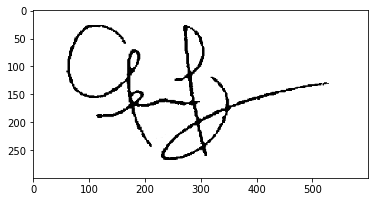

In [129]:
plt.imshow(xdata[0]) #IMAGE

In [130]:
def MODEL():
    #defining the model
    model = models.Sequential()
    model.add(layers.Conv2D(48,(11,11), activation = 'relu', input_shape=(300,600,3)))
    model.add(layers.MaxPooling2D(3,3))

    model.add(layers.Conv2D(128,(5,5),activation = 'relu'))
    model.add(layers.MaxPooling2D(3,3))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256,(3,3),activation = 'relu'))
    model.add(layers.Conv2D(96,(3,3),activation = 'relu'))
    model.add(layers.MaxPooling2D(3,3))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024,activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(output,activation='softmax')) # <=== Defining the output layer here
    #Adam is more stable than the other optimizers, it doesn’t suffer any major decreases in accuracy.
    #works well for sparse gradient
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [131]:
model = MODEL()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 290, 590, 48)      17472     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 96, 196, 48)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 92, 192, 128)      153728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 64, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 64, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 62, 256)       295168    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 60, 96)        221280    
__________

In [132]:
#CONVERTING THE DATA INTO TRAINING AND TESTING
seed =7
x_train,x_test,y_train,y_test= train_test_split(xdata,ydata,test_size=0.3,random_state=seed)

In [133]:
#resizing of the image
x_train = np.array([x for x in x_train]).reshape(-1,300,600,3)

In [134]:
#resizing of the image
x_test = np.array([x for x in x_test]).reshape(-1,300,600,3)

In [135]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 
#as converting the values ranging between 0 and 1 will help the model in training

In [136]:
x_train.shape,ydata.shape

((8, 300, 600, 3), (12, 7))

In [ ]:
history = model.fit(x_train,y_train,epochs=5,batch_size=10,verbose=1)

Epoch 1/5
8/8 [==============================] - 5s 626ms/step - loss: 1.9789 - acc: 0.2500
Epoch 2/5
8/8 [==============================] - 4s 525ms/step - loss: 10.0738 - acc: 0.3750
Epoch 3/5
8/8 [==============================] - 4s 523ms/step - loss: 10.0738 - acc: 0.3750
Epoch 4/5


In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
predict = model.predict_proba(np.array([x_test[2],]))

In [ ]:
predictprob = model.predict_proba(np.array([x_test[2],]))

In [ ]:
predict,predictprob